In [1]:
import h5py
from astropy.table import Table
import numpy as np
from scipy import interpolate
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
from main import emulator
from scipy.ndimage import gaussian_filter1d
from astropy.convolution import Gaussian1DKernel,convolve
import utils

matplotlib.rcParams['figure.figsize'] = [10, 6]
matplotlib.rcParams['figure.dpi'] = 200

In [2]:
def uJy2mAB(flux): return -2.5*np.log10(flux)+23.9

def mAB2uJy(mag): return np.power(10,(mag-23.9)/-2.5)

def dflux(mag_err,flux): return mag_err*flux/1.08574

In [3]:
mzls_origin = h5py.File('/Users/rain/emulator/emulator_v0.84/seedcat2_0_MzLS_0csp_sfh201_bc2003_hr_stelib_kroup_neb_300r_i0100_2dal8_10_inoise4.hdf5')

In [4]:
mzls = h5py.File('/Users/rain/emulator/emulator_v0.84/CSST_grism_23349_seedcat2_0_MzLS_0csp_sfh201_bc2003_hr_stelib_kroup_neb_300r_i0100_2dal8_10_inoise4.hdf5')

In [5]:
for name in mzls:
    print(name)
    # if group，show the group name and datasets
    if isinstance(mzls[name], h5py.Group):
        for subname in mzls[name]:
            print(f"  {subname}")

GI
  ferr
  flux_elec
  flux_ujy
  flux_ujy_with_noise
  snr
  snr_mask
  spec_mask
  wave
GU
  ferr
  flux_elec
  flux_ujy
  flux_ujy_with_noise
  snr
  snr_mask
  spec_mask
  wave
GV
  ferr
  flux_elec
  flux_ujy
  flux_ujy_with_noise
  snr
  snr_mask
  spec_mask
  wave
ID
data_mask
parameters_desi
parameters_grism
parameters_phot


### data_mask
if data_mask = 1, the redshift of this source is in a reasonable range;
if data_mask = 2, the redshift of this source is in a wrong range.

In [6]:
mzls['data_mask'][:]

array([1, 1, 1, ..., 1, 1, 1])

In [14]:
len(mzls['GU']['wave'][:])

338

In [15]:
len(mzls['GV']['wave'][:])

393

In [16]:
len(mzls['GI']['wave'][:])

516

(0.0, 350.0)

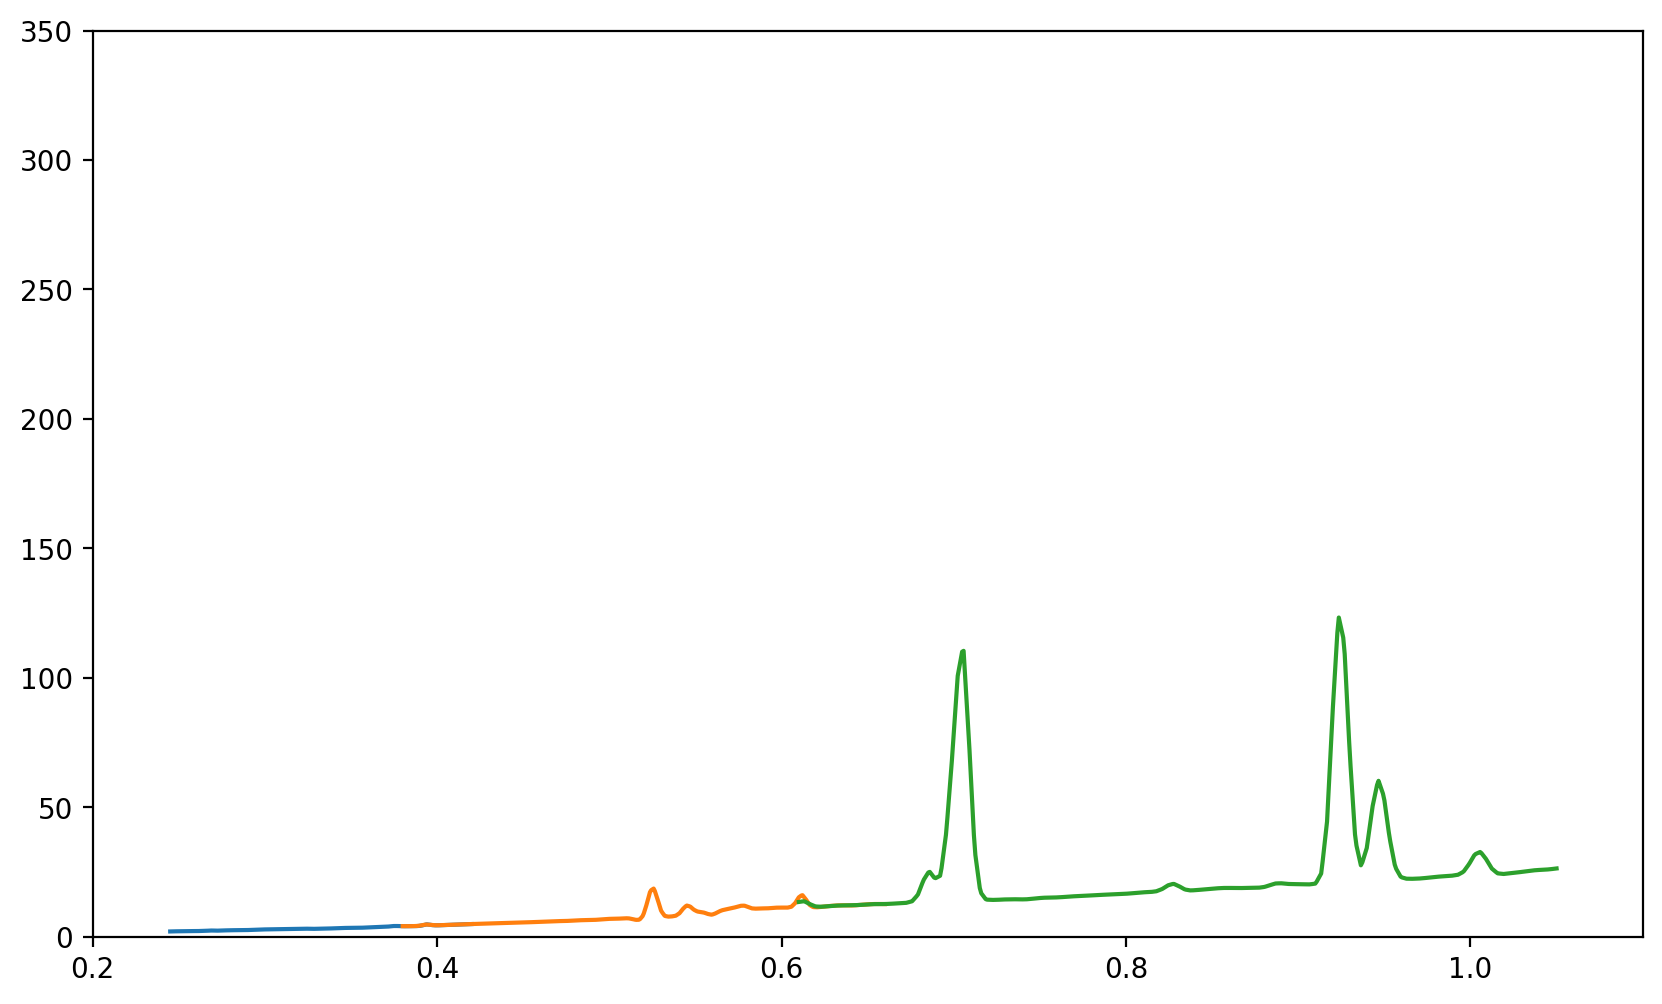

In [7]:
# plt.plot(mzlso['best_fit']['wavelength_rest'][:]*(1+mzlso['best_fit']['z'][19622]),mzlso['best_fit']['spec_csp_sfh201_bc2003_hr_stelib_kroup_neb_300r_i0100_2dal8[0,1]'][19622])
# plt.plot(modspec['wavelength_obs'],modspec['spectra_mod']+6)
# plt.plot(modspec['wavelength_obs'],modspec['spectra_obs'])
plt.plot(mzls['GU']['wave'][:]/1e4,mzls['GU']['flux_ujy'][19622])
plt.plot(mzls['GV']['wave'][:]/1e4,mzls['GV']['flux_ujy'][19622])
plt.plot(mzls['GI']['wave'][:]/1e4,mzls['GI']['flux_ujy'][19622])
plt.xlim(0.2,1.1)
plt.ylim(0,350)

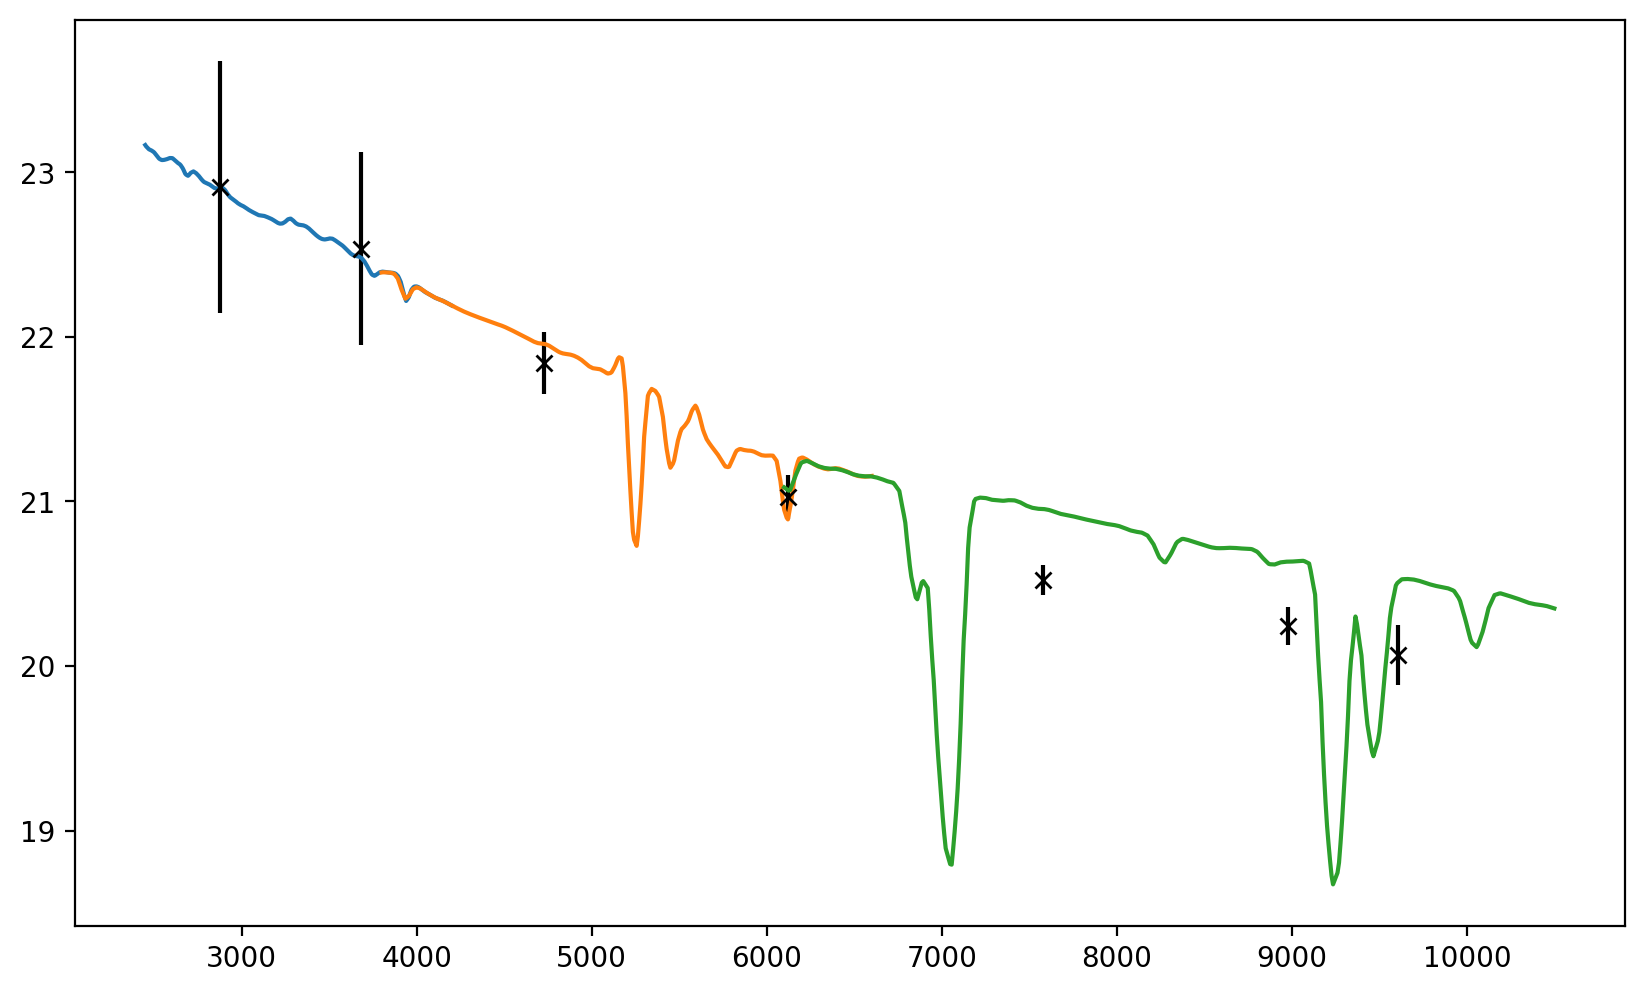

In [10]:
idx = 19622
# plt.plot(mzlso['best_fit']['wavelength_rest'][:]*(1+mzlso['best_fit']['z'][idx]),mzlso['best_fit']['spec_csp_sfh201_bc2003_hr_stelib_kroup_neb_300r_i0100_2dal8[0,1]'][idx])

# plt.plot(mzls['GU']['wave'][:]/1e4,mzls['GU']['flux_ujy_with_noise'][idx])
# plt.plot(mzls['GV']['wave'][:]/1e4,mzls['GV']['flux_ujy_with_noise'][idx])
# plt.plot(mzls['GI']['wave'][:]/1e4,mzls['GI']['flux_ujy_with_noise'][idx])

plt.errorbar(2877.52,mzls['parameters_phot'][0,idx], mzls['parameters_phot'][7,idx],c='k',marker='x')
plt.errorbar(3683.53,mzls['parameters_phot'][1,idx], mzls['parameters_phot'][8,idx],c='k',marker='x')
plt.errorbar(4729.27,mzls['parameters_phot'][2,idx], mzls['parameters_phot'][9,idx],c='k',marker='x')
plt.errorbar(6121.62,mzls['parameters_phot'][3,idx], mzls['parameters_phot'][10,idx],c='k',marker='x')
plt.errorbar(7578.78,mzls['parameters_phot'][4,idx], mzls['parameters_phot'][11,idx],c='k',marker='x')
plt.errorbar(8979.86,mzls['parameters_phot'][5,idx], mzls['parameters_phot'][12,idx],c='k',marker='x')
plt.errorbar(9607.87,mzls['parameters_phot'][6,idx], mzls['parameters_phot'][13,idx],c='k',marker='x')
plt.plot(mzls['GU']['wave'][:], uJy2mAB(mzls['GU']['flux_ujy'][idx]))
plt.plot(mzls['GV']['wave'][:], uJy2mAB(mzls['GV']['flux_ujy'][idx]))
plt.plot(mzls['GI']['wave'][:], uJy2mAB(mzls['GI']['flux_ujy'][idx]))

# plt.xlim(0.2,1.1)
# plt.ylim(0,100)

(0.0, 150.0)

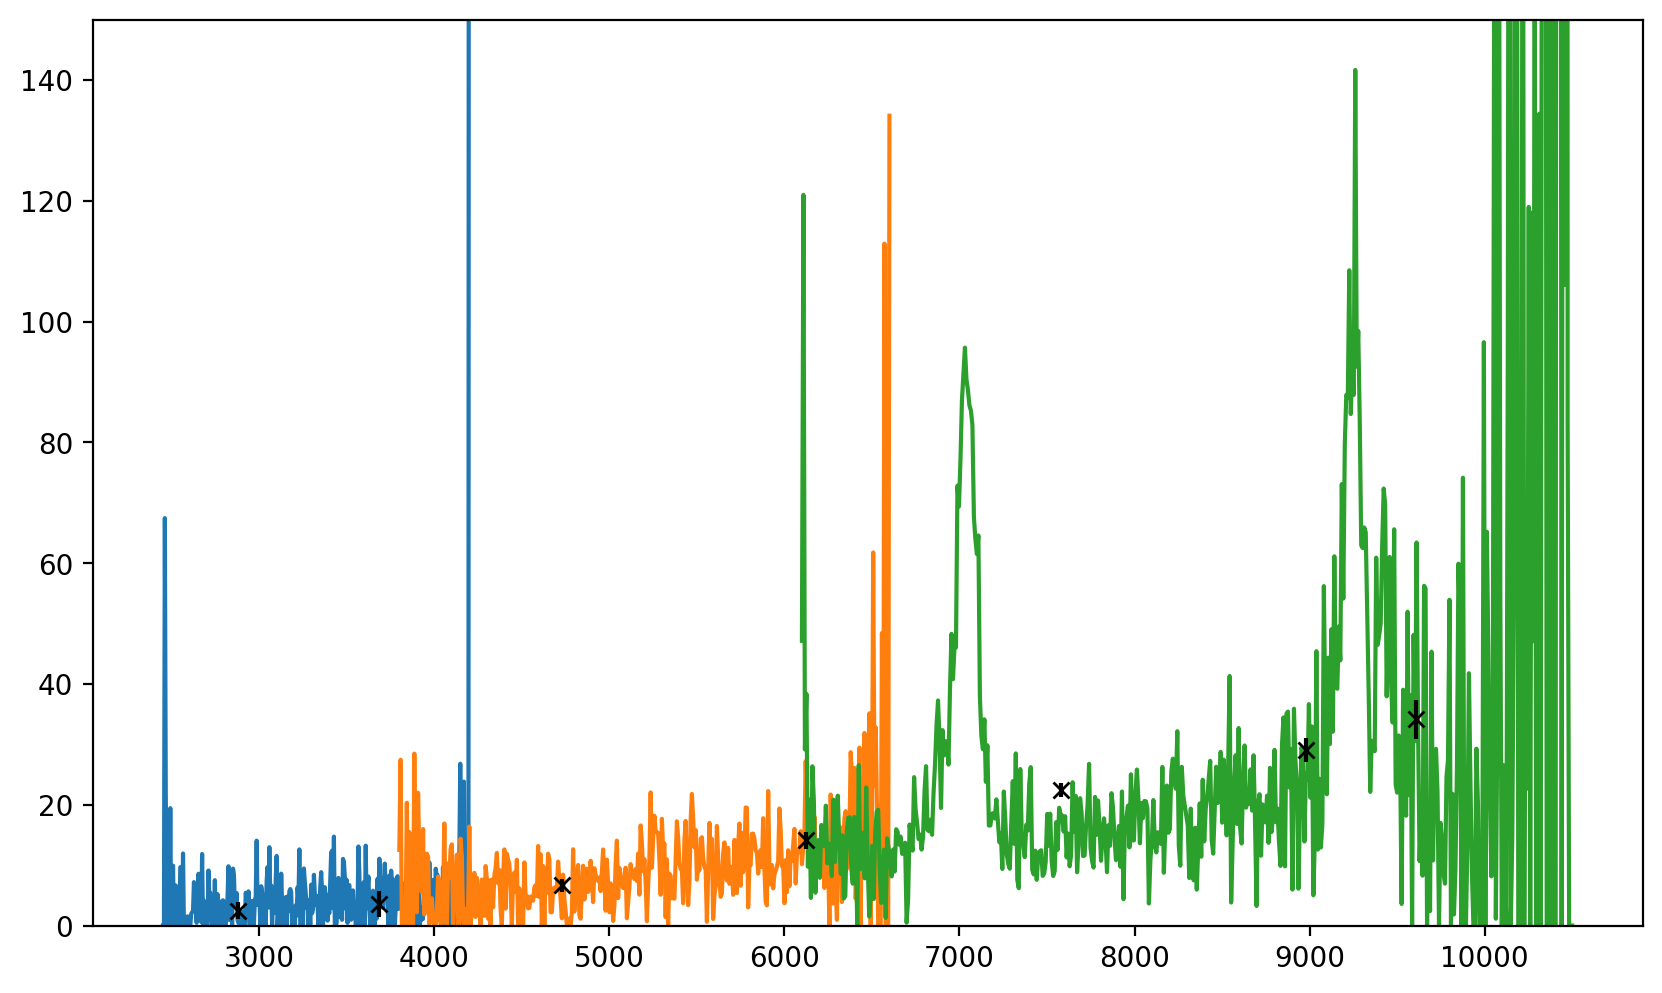

In [13]:
idx = 19622
# plt.plot(mzlso['best_fit']['wavelength_rest'][:]*(1+mzlso['best_fit']['z'][idx]),mzlso['best_fit']['spec_csp_sfh201_bc2003_hr_stelib_kroup_neb_300r_i0100_2dal8[0,1]'][idx])

plt.plot(mzls['GU']['wave'][:],mzls['GU']['flux_ujy_with_noise'][idx])
plt.plot(mzls['GV']['wave'][:],mzls['GV']['flux_ujy_with_noise'][idx])
plt.plot(mzls['GI']['wave'][:],mzls['GI']['flux_ujy_with_noise'][idx])

plt.errorbar(2877.52,mAB2uJy(mzls['parameters_phot'][0,idx]), dflux(mzls['parameters_phot'][7,idx],2),c='k',marker='x')
plt.errorbar(3683.53,mAB2uJy(mzls['parameters_phot'][1,idx]), dflux(mzls['parameters_phot'][8,idx],4),c='k',marker='x')
plt.errorbar(4729.27,mAB2uJy(mzls['parameters_phot'][2,idx]), dflux(mzls['parameters_phot'][9,idx],6),c='k',marker='x')
plt.errorbar(6121.62,mAB2uJy(mzls['parameters_phot'][3,idx]), dflux(mzls['parameters_phot'][10,idx],12),c='k',marker='x')
plt.errorbar(7578.78,mAB2uJy(mzls['parameters_phot'][4,idx]), dflux(mzls['parameters_phot'][11,idx],14),c='k',marker='x')
plt.errorbar(8979.86,mAB2uJy(mzls['parameters_phot'][5,idx]), dflux(mzls['parameters_phot'][12,idx],19),c='k',marker='x')
plt.errorbar(9607.87,mAB2uJy(mzls['parameters_phot'][6,idx]), dflux(mzls['parameters_phot'][13,idx],19),c='k',marker='x')
# plt.plot(mzls['GU']['wave'][:], uJy2mAB(mzls['GU']['flux_ujy'][idx]))
# plt.plot(mzls['GV']['wave'][:], uJy2mAB(mzls['GV']['flux_ujy'][idx]))
# plt.plot(mzls['GI']['wave'][:], uJy2mAB(mzls['GI']['flux_ujy'][idx]))

# plt.xlim(0.2,1.1)
plt.ylim(0,150)